# Esonero 2 - 17 Maggio 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice descrivendo le operazioni effettuate


# Esercizio 1

Data la seguente immagine, costruire la feature pyramid di gaussiane e descrivere il procedimento

![](figure1.jpg)

In [6]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from scipy.ndimage import affine_transform, zoom
from scipy import misc,linalg
import scipy.ndimage as ndimage
# Necessario per mostrare le figure nei notebooks
%matplotlib inline

In [12]:
def generate_octave(init_level, s, sigma): 
    octave = [init_level] 
    k = 2**(1/s) 
    for _ in range(s+2): 
        next_level = ndimage.gaussian_filter(octave[-1],k * sigma)
        octave.append(next_level) 
    return octave

def generate_gaussian_pyramid(im, num_octave, s, sigma): 
    pyr = [] 
    for _ in range(num_octave): 
        octave = generate_octave(im, s, sigma) 
        pyr.append(octave) 
        im = octave[-3][::2, ::2] 
    return pyr

In [13]:
def plot_pyramid(p,sz,hspace=10,vspace=10):
    rows, cols = sz[0],sz[1]

    nrows = sum([x[0].shape[0] for x in p]) +  vspace*(num_octave-1)
    ncols = cols*(s+3)+hspace*(s+2)
    output_image = np.ones((nrows,ncols))

    r = 0
    for i in range(len(p)):
        c = 0
        for j in range(len(p[i])):
            w,h = p[i][j].shape
            output_image[r:r+w,c:c+h] = p[i][j]
            c += cols + hspace
        r += w + vspace
    
    return output_image


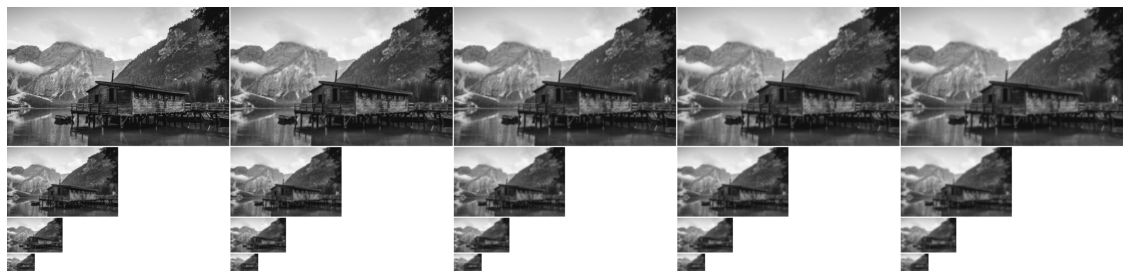

In [15]:
num_octave = 4
s = 2
sigma = 2

p = generate_gaussian_pyramid(image,num_octave,s,sigma)

output_pyr = plot_pyramid(p,image.shape)

fig = plt.figure(figsize=(20, 20))

plt.imshow(output_pyr,cmap=cm.gray)
plt.axis('off')
plt.show()

rappresenta un'immagine come una famiglia di versioni smoothed della stessa immagine, con l'obiettivo di simulare la perdita di dettagli che si avrebbe riducendo la scala

# Esercizio 2


Data la seguente sequenza di tensori e la funzione *f*, calcolare il gradiente per i tensori a,b,c,d,e,y. 

Descrivere come viene costruito il grafo di computazione mostrando quali operazioni vengono effettuate, cioè calcolando le derivate parziali in maniera esplicita. 

$
y = f(a,b,c,d,e) = \sum \frac {a^5 + \exp(b^2) * \sin (c*d)} {3e}
$

*non sono necessarie librerie esterne*

In [120]:
import torch

In [128]:
a = torch.tensor([5, 6, 7, 8, 1, 2], dtype=torch.float, requires_grad=True).view(3, 2)
b = torch.tensor([3, 3, 0, 1, 6, 2], dtype=torch.float, requires_grad=True).view(3, 2)
c = torch.tensor([1, 5, 0, 7, 4, 3], dtype=torch.float, requires_grad=True).view(3, 2)
d = torch.tensor([2, 6, 3, 8, 3, 1], dtype=torch.float, requires_grad=True).view(3, 2)
e = torch.tensor([5, 2, 1, 1, 1, 1], dtype=torch.float, requires_grad=True).view(3, 2)

In [129]:
a

tensor([[5., 6.],
        [7., 8.],
        [1., 2.]], grad_fn=<ViewBackward>)

In [140]:
f = torch.sum((a**5 + torch.exp(b**2)*torch.sin(c*d))/(3*e))
a.retain_grad()
b.retain_grad()
c.retain_grad()
d.retain_grad()
e.retain_grad()

In [141]:
f.backward()

In [142]:
a.grad

tensor([[4.1667e+02, 2.1600e+03],
        [8.0033e+03, 1.3653e+04],
        [3.3333e+00, 5.3333e+01]])

In [143]:
b.grad

tensor([[ 2.9472e+03, -8.0061e+03],
        [ 0.0000e+00, -9.4515e-01],
        [-9.2532e+15,  1.0273e+01]])

In [144]:
b.grad

tensor([[ 2.9472e+03, -8.0061e+03],
        [ 0.0000e+00, -9.4515e-01],
        [-9.2532e+15,  1.0273e+01]])

In [145]:
c.grad

tensor([[-4.4961e+02,  1.2499e+03],
        [ 1.0000e+00,  6.1848e+00],
        [ 3.6380e+15, -1.8017e+01]])

In [146]:
d.grad

tensor([[-2.2480e+02,  1.0416e+03],
        [ 0.0000e+00,  5.4117e+00],
        [ 4.8507e+15, -5.4052e+01]])

In [147]:
e.grad

tensor([[-1.3991e+02,  1.9175e+01],
        [-5.6023e+03, -1.0922e+04],
        [ 7.7110e+14, -1.3235e+01]])

In [86]:
a

tensor([[5., 6.],
        [7., 8.],
        [1., 2.]], grad_fn=<ViewBackward>)

In [35]:
b

tensor([[3., 3.],
        [0., 1.],
        [6., 2.]], grad_fn=<ViewBackward>)

In [36]:
c

tensor([[1., 5.],
        [0., 7.],
        [4., 3.]], grad_fn=<ViewBackward>)

In [37]:
d

tensor([[2., 6.],
        [3., 8.],
        [3., 1.]], grad_fn=<ViewBackward>)

In [38]:
e

tensor([[5., 2.],
        [1., 1.],
        [1., 1.]], grad_fn=<ViewBackward>)

Per descrivere come si propaga il gradiente su a,b,c,d,e utilizzeremmo la regola della catena per le derivate parziali e della proprietà addititiva delle derivate.

# Esercizio 3

Dati due batch A e B, mostrare gli effetti della BN.

Suggerimento: calcolare gli istogrammi di A e B

# Esercizio 4

Dato il seguente frammento di codice

In [105]:
conv1 = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2)
conv2 = torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

model = lambda x: conv2(conv1(x))

In [106]:
import cv2

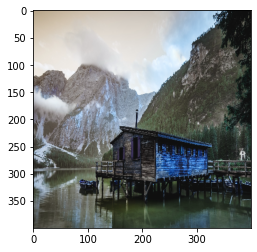

In [107]:
img = cv2.resize(cv2.imread('figure1.jpg'),(400,400))/256
plt.imshow(img)

In [108]:
img.shape

(400, 400, 3)

In [109]:
import torchvision.transforms as transforms
img = transforms.ToTensor()(cv2.resize(cv2.imread('figure1.jpg'),(400,400)))

In [110]:
img.shape

torch.Size([3, 400, 400])

In [111]:
img = img.view((1,3,400,400))

Indicare giustificando la risposta qual'è il risultato per un'immagine 1x3x400x400 illustrandolo con un esempio. 

In [112]:
img.shape

torch.Size([1, 3, 400, 400])

In [113]:
res = model(img)

In [114]:
res.shape

torch.Size([1, 30, 66, 50])

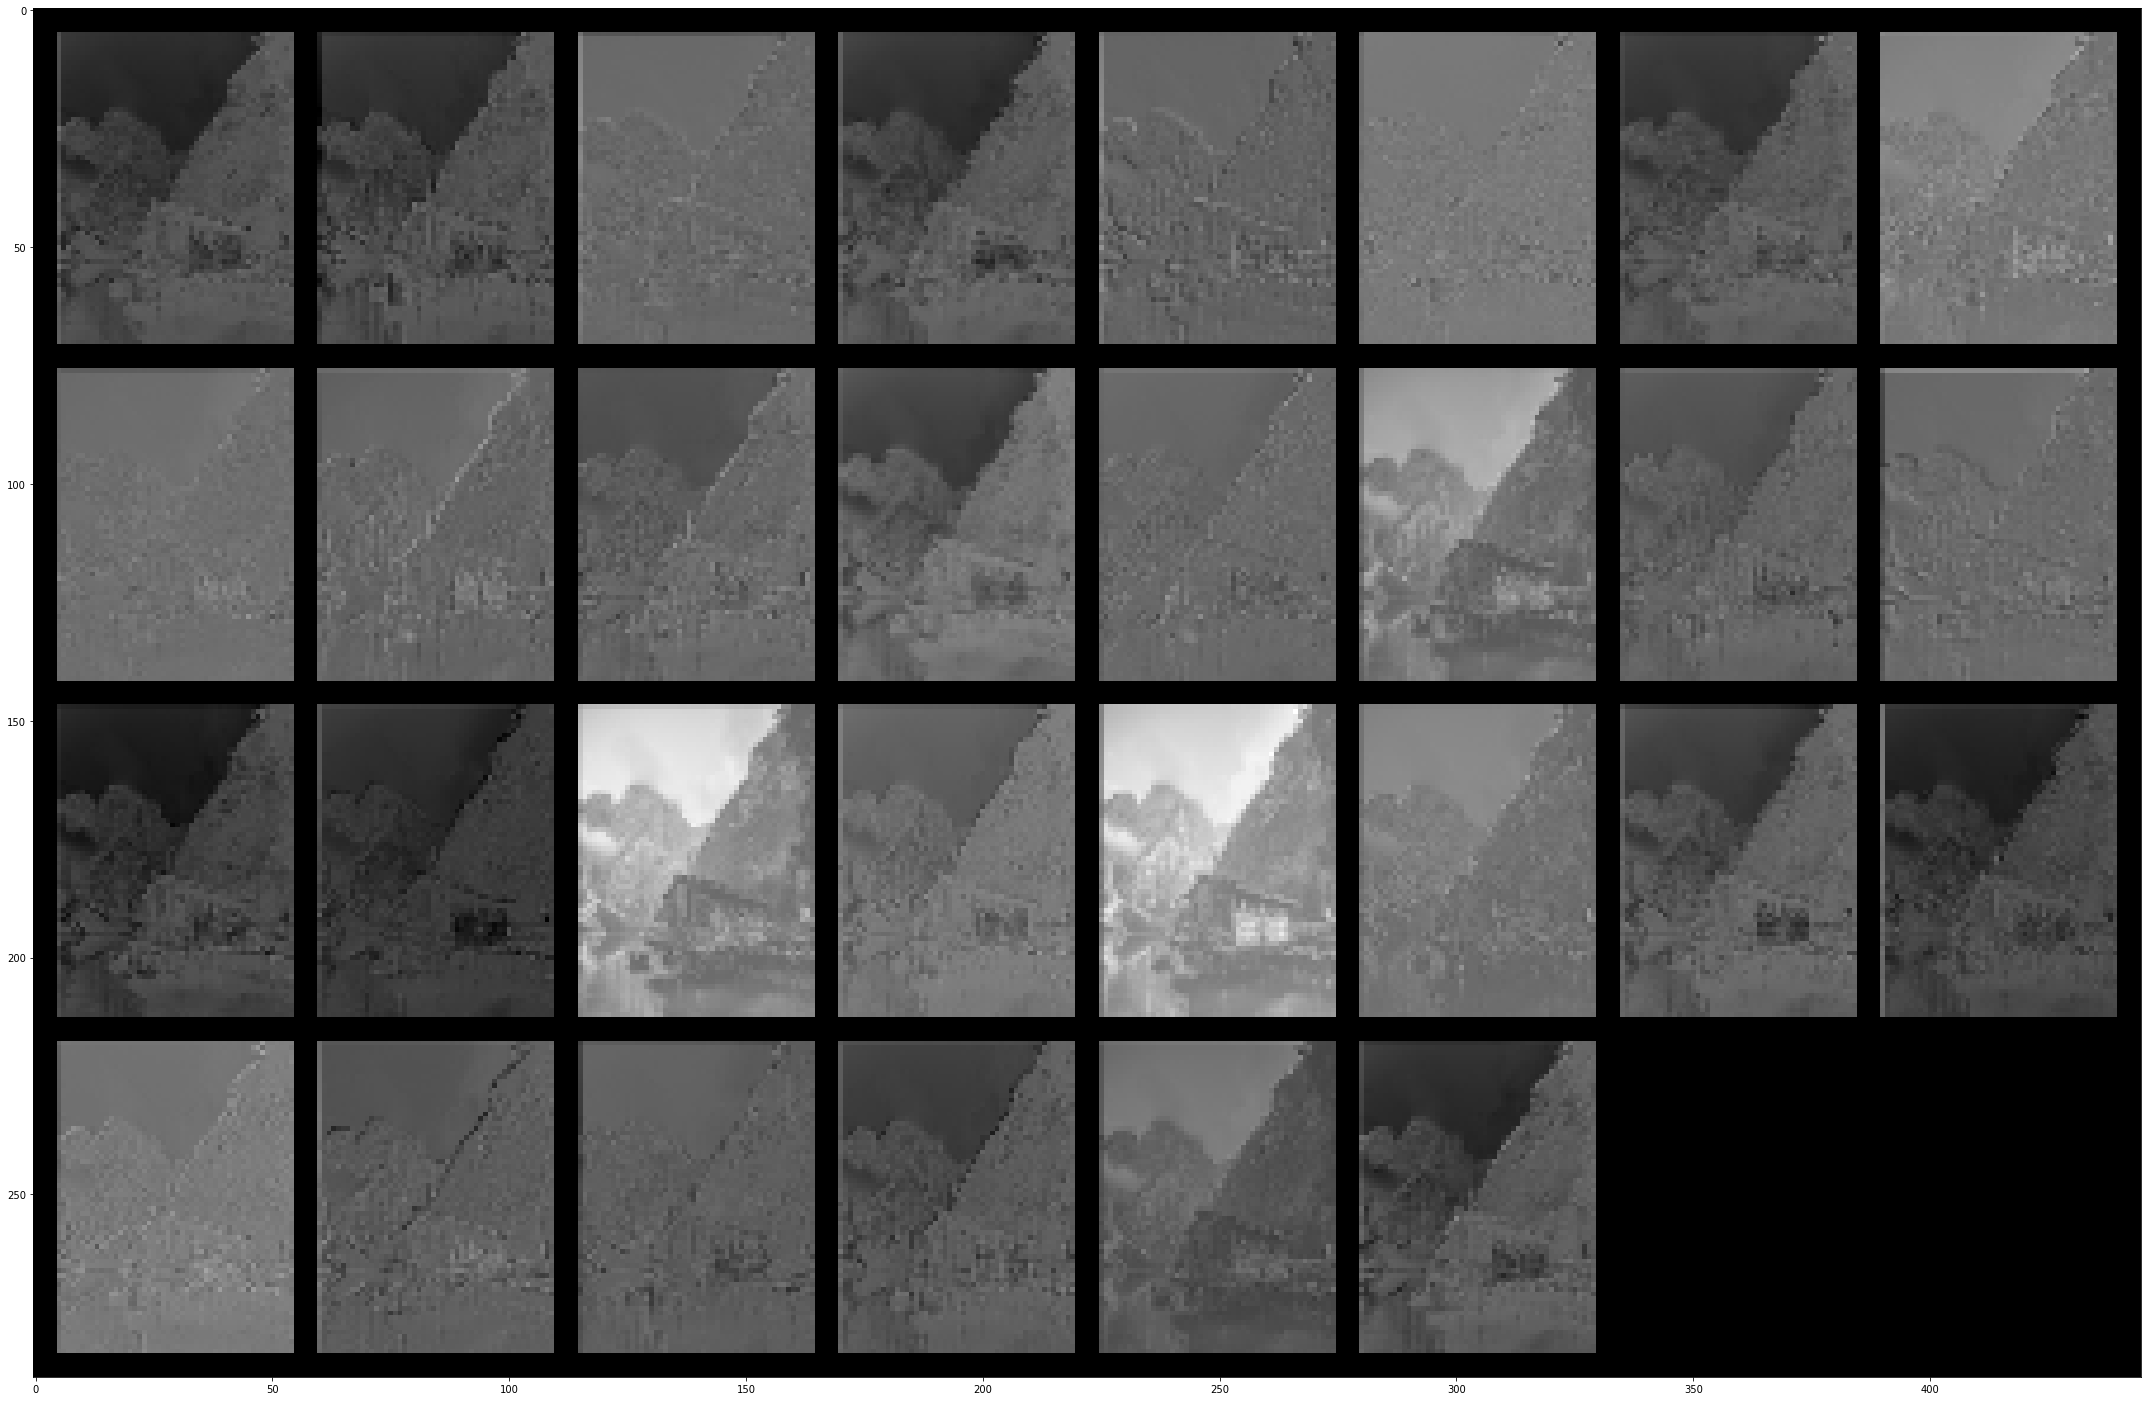

In [115]:
from torchvision.utils import make_grid
features = res[:].permute(1,0,2,3)
img = make_grid(features,padding=5,normalize=True).permute(1,2,0).detach().numpy()
plt.figure(figsize=(30,30))
plt.subplot(1,1,1)
plt.tight_layout()
plt.imshow(img,cmap='gray', interpolation='none')

# Esercizio 5

Adattare/semplificare la rete VGG affinché gestisca un input di immagini 400x400

# Esercizio 6

Data la seguente immagine, calcolare la IoU tra i due box mostrati in figura. 
Descrivere tutte le operazioni effettuate

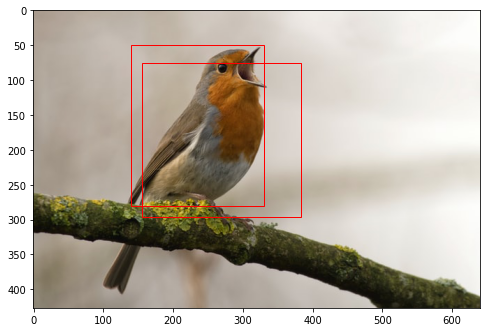

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
import matplotlib.patches as patches

def plot_bbox(image_np, bbox_list):
    fig, ax = plt.subplots(1)
    fig.set_size_inches(8, 8)

    ax.imshow(image_np)

    for bbox_idx in range(bbox_list.shape[0]):
        x1, y1, x2, y2 = bbox_list[bbox_idx, :].tolist()

        w = x2 - x1
        h = y2 - y1

        rect = patches.Rectangle((x1, y1), w, h,
                                 linewidth=1, 
                                 edgecolor='r', 
                                 facecolor='none')

        ax.add_patch(rect)

    plt.show();

imageBB1 = mp_image.imread('figure2.jpg')

bb1 = [140, 50, 330, 280]
bb2 = [156, 75, 384, 297]

plot_bbox(imageBB1, np.array([bb1, bb2]))